In [1]:
%matplotlib inline
import torch
from basics.nets.mlp_encoder import Encoder
from basics.nets.mlp_decoder import Decoder
from torchvision import datasets, transforms

CUDA = torch.cuda.is_available()
if CUDA:
    device = torch.device('cuda:1')
print('torch:', torch.__version__, 'CUDA:', CUDA)
pixel_dim = 784
latent_dim = 10
sample_size = 1
hidden_dim = 128
batch_size = 500
reparameterized = True

data_dir = '/home/hao/Research/sebm_data/'
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,),(0.5,))]) 
data = torch.utils.data.DataLoader(
                    datasets.MNIST(data_dir, train=False, download=True,
                                   transform=transform),
                    batch_size=batch_size, shuffle=True) 

print('Initialize encoder and decoder and optimizer...')
enc = Encoder(latent_dim, hidden_dim, pixel_dim, reparameterized=reparameterized)
dec = Decoder(latent_dim, hidden_dim, pixel_dim, CUDA, device)
if CUDA:
    with torch.cuda.device(device):
        enc.cuda()  
        dec.cuda()
print('Loading trained models...')
load_version = 'vae-mnist-zd=%s' % (latent_dim)
enc.load_state_dict(torch.load('../weights/rws-mlp-enc-%s' % load_version))
dec.load_state_dict(torch.load('../weights/rws-mlp-dec-%s' % load_version))

torch: 1.6.0 CUDA: True
Initialize encoder and decoder and optimizer...
Loading trained models...


<All keys matched successfully>

In [2]:
from basics.eval import plot_samples, compress_tsne, plot_tsne

# for (images, _) in data:
#     break
# images = images.squeeze().view(batch_size, 784).repeat(sample_size, 1, 1).cuda().to(device)
# latents, _ = enc.forward(images)
# _, recons, _ = dec.forward(latents, images)
# plot_samples(recons.view(sample_size, batch_size, 28, 28))

In [3]:
zs2, ys = compress_tsne(data, enc, dec, device, sample_size)


run test set..
transform latent to 2D tsne features..


NameError: name 'num_classes' is not defined

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.manifold import TSNE
def plot_tsne(num_classes, zs2, ys, save_name):
    print('plotting tsne figure..')
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    colors = []
    for k in range(num_classes):
        m = (ys == k)
        p = ax.scatter(zs2[m, 0], zs2[m, 1], label='y=%d' % k, alpha=0.5, s=5)
        colors.append(p.get_facecolor())
    ax.legend()
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    if save_name is not None:
        plt.savefig(save_name + '_tsne.png', dpi=300)

plotting tsne figure..


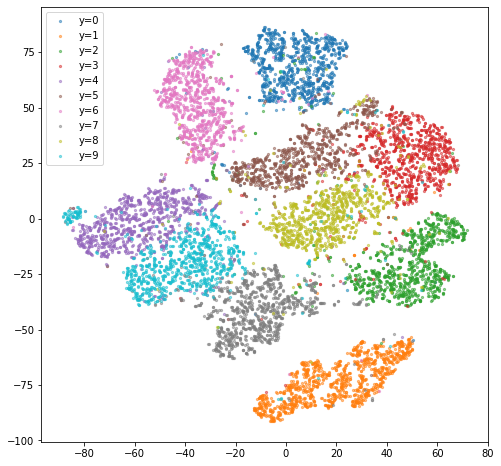

In [7]:
num_classes =10
plot_tsne(num_classes, zs2, ys, save_name='vae_sample')